# Практическая работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 0303 Смирнов Артем и Переверза Михаил. Вариант №2.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

*Дискретным* называют сигнал, дискретный по времени и непрерывный по состоянию (уровню), который описывается последовательностью чисел бесконечной разрядности x(nT ) или x(n) , называемой коротко последовательностью.

В теории ЦОС термины "дискретный сигнал" и "последовательность" употребляют в тождественном смысле.

Если операции над сигналами – линейные, то система является  линейной. Для линейных систем справедлив принцип суперпозиции, т.е. *линейной комбинации* входных сигналов соответствует такая же линейная комбинация выходных сигналов.


*Средним значением последовательности M* называют сумму ее значений, отнесенную к длине:

$$M = \frac{\sum_{k=0}^{N}x(k)}{N}$$

*Энергией последовательности E* называют сумму квадратов ее значений, а *средней мощностью P* — энергию, отнесенную к длине последовательности:

$$E = \sum_{k=0}^{N}|x(k)|^2$$

$$P = \frac{E}{N} = \frac{\sum_{k=0}^{N}|x(k)|^2}{N}$$

*Огибающая кривая (или функция)* — это такая кривая (функция), которая в каждой своей точке касается некоторого множества.

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы


| Переменная | Назначение | Значение | Идентификатор |
|:---:|:---:|:--------------------:|:---:|
| $ N_{бр} $ |  Номер бригады  | $$ N_{бр} = 2 $$  | `Nb` |
| $ N $ | Длина последовательности | $$ N = 30 + N_{бр} mod5$$ | `N` |
| $ a $ | Основание экспоненты | $$ a =(-1)^{N_{бр}} (0.8 + 0.005 (N_{бр}mod20)) $$| `a` |
| $ C $ | Амплитуда гармонического сигнала | $$C = 1 + N_{бр}mod5$$ | `C` |
|  $ \hat{\omega}_0 $ (рад) | Частота гармонического сигнала | $$\hat{\omega}_0 = \pi/(6 + N_{бр}mod5)$$ | `w0` |
| $ U $ | Амплитуда импульса | $$U = N_{бр}$$ | `U` |
| $ n_0 $ | Начальный момент импульса | $$n_0 = 3 + N_{бр}mod5 $$ | `n0` |
| $ n_{imp} $ | Длина импульса | $$ n_{imp} = 5 + N_{бр}mod5 $$| `n_imp` |
| $ B_1 $ | Амплитуды гармонических сигналов| $$B_1 = 1.5 + N_{бр}mod5$$| `B1` |
| $ B_2 $ | |  $$B_2 = 5.7 - N_{бр}mod5$$| `B2` |
| $ B_3 $ | |  $$B_3 = 2.2 + N_{бр}mod5$$| `B3` |
| $ \hat{\omega}_1 $|  Частоты гармонических сигналов| $$ \hat{\omega}_1 = \pi/(4 + N_{бр}mod5) $$| `w1` |
| $ \hat{\omega}_2 $| | $$\hat{\omega}_2 = \pi/(8 + N_{бр}mod5)$$| `w2` |
| $ \hat{\omega}_3 $| | $$\hat{\omega}_3 = \pi/(16 + N_{бр}mod5)$$| `w3` |
| $ a_1 $ | Коэффициенты линейной комбинации гармонических сигналов | $$ a_1 = 1.5 - N_{бр}mod5$$ | `a1` |
| $ a_2 $ | | $$a_2 = 0.7 + N_{бр}mod5$$ | `a2` |
| $ a_3 $ | | $$a_3 = 1.4 + N_{бр}mod5$$ | `a3` |

Импортируем необходимые библиотеки:

In [33]:
import math
from collections.abc import Callable, Iterable, Sequence
from functools import partial
import numpy as np
import matplotlib.pyplot as plt

Инициализируем переменные в коде:

In [34]:
Nb = 2 # Номер бригады
N = 30 + Nb % 5 # Длина последовательности
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20)) # Основание экспоненты
C = 1 + Nb % 5 # Амплитуда гармонического сигнала
w0 = np.pi / (6 + Nb % 5) # Частота гармонического сигнала
U = Nb # Амплитуда импульса
n0 = 3 + Nb % 5 # Начальный момент импульса
n_imp = 5 + Nb % 5 # Длина импульса

# Амплитуды гармонических сигналов
B = [1.5 + Nb % 5, 5.7 - Nb % 5, 2.2 + Nb % 5]
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5

# Частоты гармонических сигналов
w = [np.pi / (4 + Nb % 5), np.pi / (8 + Nb % 5), np.pi / (16 + Nb % 5)]
w1 = np.pi / (4 + Nb % 5)
w2 = np.pi / (8 + Nb % 5)
w3 = np.pi / (16 + Nb % 5)

# Коэффициенты линейной комбинации гармонических сигналов
a_i = [1.5 - Nb % 5, 0.7 + Nb % 5, 1.4 + Nb % 5]
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

А также определим функцию для отображения графиков:

In [35]:
from dataclasses import dataclass


@dataclass
class Graphic:
    """Абстракция для передачи информации о построении графика"""

    graphics: list[Sequence[Callable, Callable, Iterable[int], str]]
    """Графики"""
    x_label: str
    """Подпись к графику по x"""
    y_label: str
    """Подпись к графику по y"""


def print_graphic(signal_func: Iterable[Graphic]):
    """Отображение группы графиков"""

    plt.figure(figsize=(20, 10))
    colors = ['blue', 'red', 'green', 'pink', 'orange']

    block: Graphic
    for i, block in enumerate(signal_func, start=1):
        plt.subplot(len(signal_func), 1, i)

        for j, signal in enumerate(block.graphics):

            match signal[0]:
                case plt.stem:
                    color_arg = 'linefmt'
                case _:
                    color_arg = 'color'

            signal[0](signal[2], signal[1](signal[2]), label=signal[3], **{color_arg: colors[j]})

        plt.legend()
        plt.xlabel(block.x_label)
        plt.ylabel(block.y_label)
    plt.show()

### Задание 1. Моделирование дискретного прямоугольного импульса

Необходимо смоделировать дискретный прямоугольный импульс:

$$s_1(k) = \begin{cases} U,& \quad n_0 \leqslant k \leqslant n_0 + n_{imp} - 1; \\ 0,& \quad \mbox{иначе} \\ \end{cases} $$

на основе дискретного единичного скачка $ \sigma_d(k) $ из л/р №1 с выводом графика на интервале времени $ n \in [0, N - 1] $.

---

Для моделирования дискретного прямоугольного импульса $s_1$ мы воспользуемся принципом суперпозиции, позволяющим находить спектр суммы или разности функций времени в виде суммы или разности соответствующих этим функциям спектров. Представим прямоугольный импульс , действующий на протяжении отрезка времени от $n_0$ до  $n_{imp}$, в виде разности двух скачков: одного в момент $n_0$ и другого в момент $n_{imp}$.

In [36]:
def sigma_d(k: float) -> int:
    return 1 if k >= 0 else 0


def rectangle_signal(x: list[int]):
    # s1(k)

    return [U * (sigma_d(i - n0) - sigma_d(i - n0 - n_imp)) for i in x]

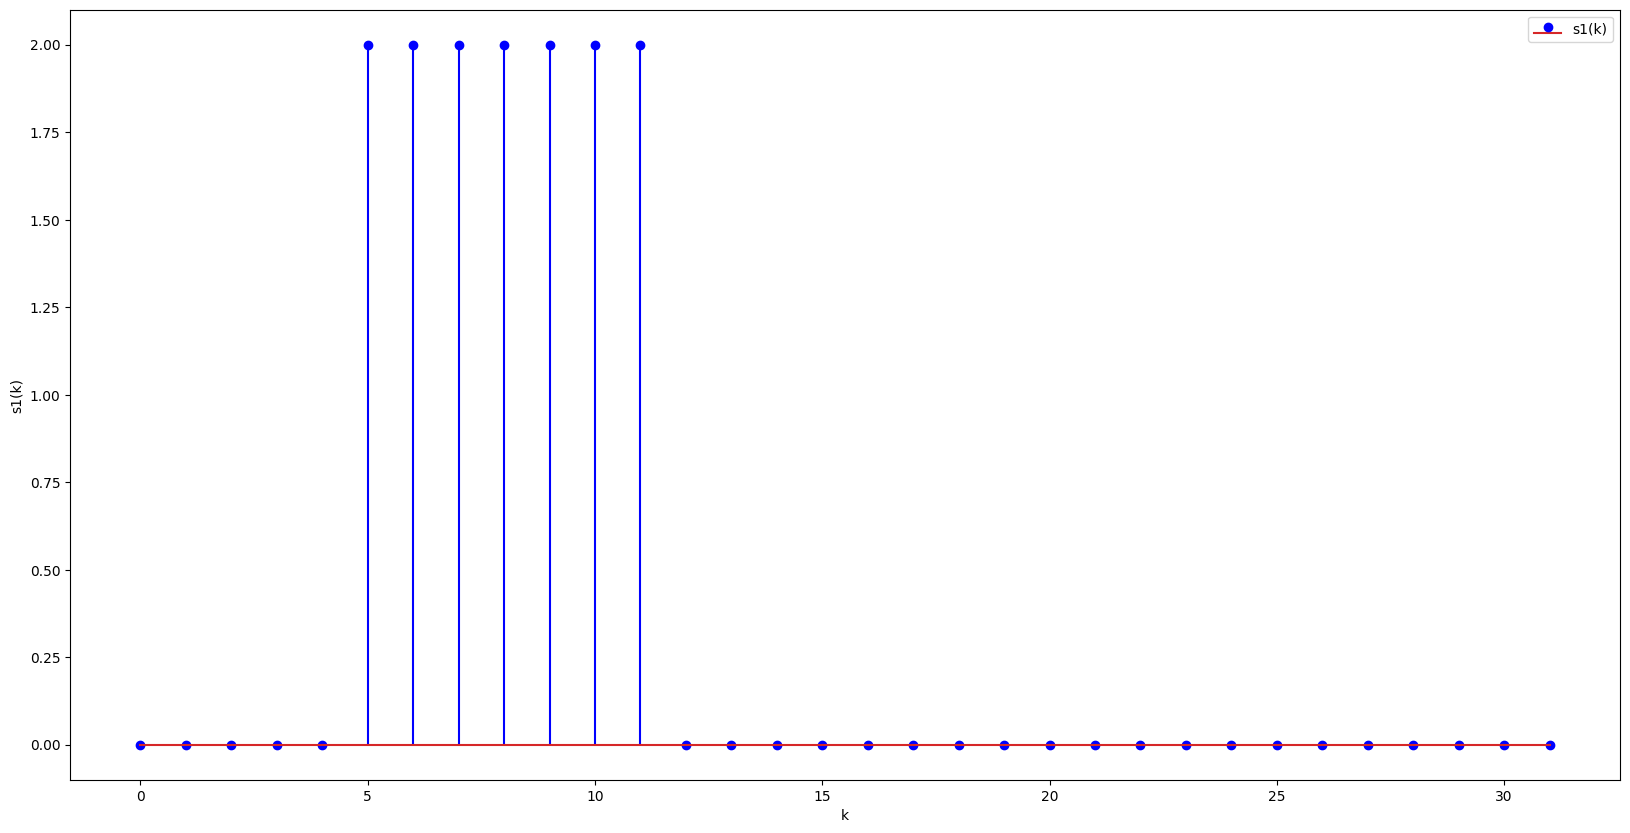

In [37]:
x = list(range(N))
print_graphic([Graphic([(plt.stem, rectangle_signal, x, 's1(k)')], 'k', 's1(k)')])

### Задание 2. Моделирование линейной комбинации дискретных гармонических сигналов

Необходимо смоделировать линейную комбинацию дискретных гармонических сигналов $ s_2(k) $:

$$ s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k),$$

где

$$x_i(k) = B_i\sin(\hat\omega_ik), \quad i = 1, 2, 3, $$

с выводом графиков последовательностей $ x_i(k) $ и $ s_2(k) $ на интервале времени $ n \in [0, 5N - 1] $.

Вычислить среднее значение (идентификатор ''mean_s2''), энергию (идентификатор ''E'') и среднюю мощность последовательности $ s_2(k) $ (идентификатор ''P'').

---

Для получения результирующего сигнала необходимо определить значения гармонических составляющих сигнала каждой выборки, умножить их на заданный коэффициент и сложить.

In [38]:
def x_i_signal(k: int, i: int):
    assert i in (0, 1, 2)

    return B[i] * math.sin(w[i] * k)

In [39]:
def linear_comb_signal(k: list[int]):
    # s2(k)

    return [sum((a_i[j] * x_i_signal(i, j) for j in range(3))) for i in k]


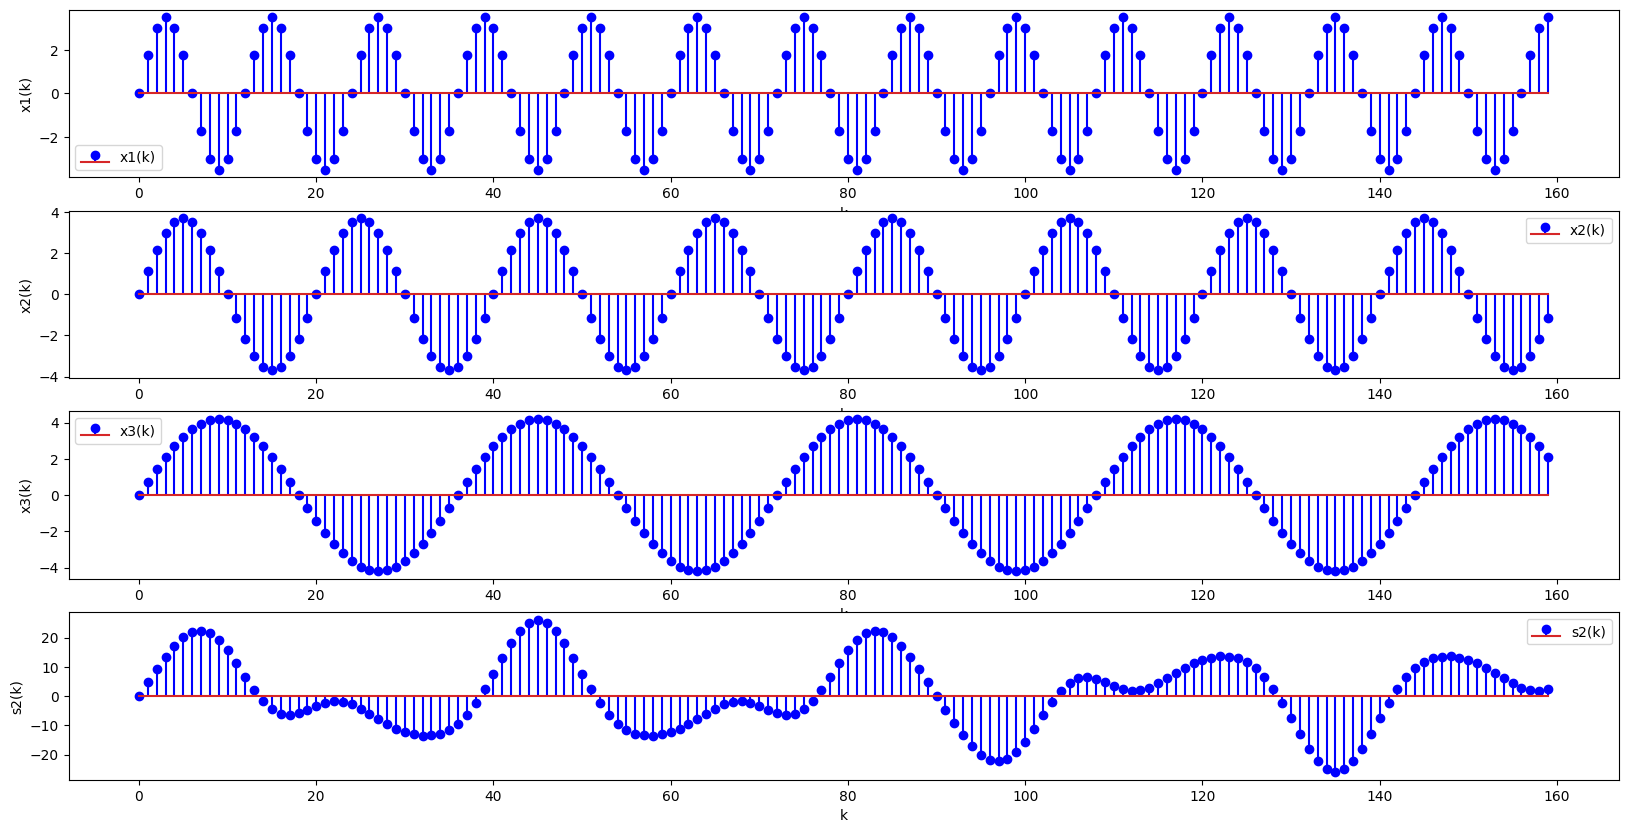

In [40]:
# код для графиков
x = list(range(5 * N))
print_graphic(
    signal_func=[
            Graphic([(plt.stem, lambda x_1: [x_i_signal(k, 0) for k in x_1], x, 'x1(k)')], 'k', 'x1(k)'),    # x1(k)
            Graphic([(plt.stem, lambda x_1: [x_i_signal(k, 1) for k in x_1], x, 'x2(k)')], 'k', 'x2(k)'),    # x2(k)
            Graphic([(plt.stem, lambda x_1: [x_i_signal(k, 2) for k in x_1], x, 'x3(k)')], 'k', 'x3(k)'),    # x3(k)
            Graphic([(plt.stem, linear_comb_signal, x, 's2(k)')], 'k', 's2(k)'),   # s2(k)
    ],
)

Среднее значение дискретного сигнала определяется как среднее значение значений выборок в данном интервале $ n \in [0, 5N - 1] $:

$$mean_{s2} = \frac{\sum_{k=0}^{5N-1}x(k)}{5N}$$

Энергия - как сумма квадратов значений выборок в данном интервале:

$$E = \sum_{k=0}^{5N-1}|x(k)|^2$$

Средняя мощность - как среднее значение квадратов значений выборок в данном интервале:

$$P = \frac{\sum_{k=0}^{5N-1}|x(k)|^2}{5N}$$

In [41]:
# среднее значение
mean_s2 = sum(linear_comb_signal(x)) / len(x)
print(f'mean_s2 = {mean_s2:0.3f}')

# энергия
E = sum((signal_value ** 2 for signal_value in linear_comb_signal(x)))
print(f'{E=:0.3f}')

# средняя мощность
P = E / len(x)
print(f'{P=:0.3f}')

mean_s2 = 0.948
E=24233.794
P=151.461


### Задание 3. Моделирование дискретного сигнала $ s_3(k) $

Необходимо вывести график дискретного сигнала $ s_3(k) $ представляющего собой дискретный гармонический сигнал $ s(k) $

$$ s(k) = C\cos(\hat{\omega}_0k) $$

с экспоненциальной огибающей $ |a|^k $, на интервале времени $ n \in [0, N-1] $.

---

Приведем аналитическую формулу дискретного сигнала $ s_3(k) $, полученную путем произведения дискретного гармонического сигнала $ s(k) $ и экспоненциальной огибающей $ |a|^k $, на интервале времени $ n \in [0, N-1] $:

$$s_3(k) = |a|^k * s(k)$$

In [42]:
# объявление x для построения графика огибающей
density_x_count = 1000
density_x_imp = (N - 1) / density_x_count
density_x = [density_x_imp * i for i in range(density_x_count)]

In [43]:
def envelope_stripe(k: list[float]):
    """Огибающая"""

    return [C * abs(a) ** x for x in k]

In [44]:
def discret_gramonic_signal(k: list[int]):
    """s3(k)"""

    return [C * math.cos(x * w0) * abs(a) ** x for x in k]

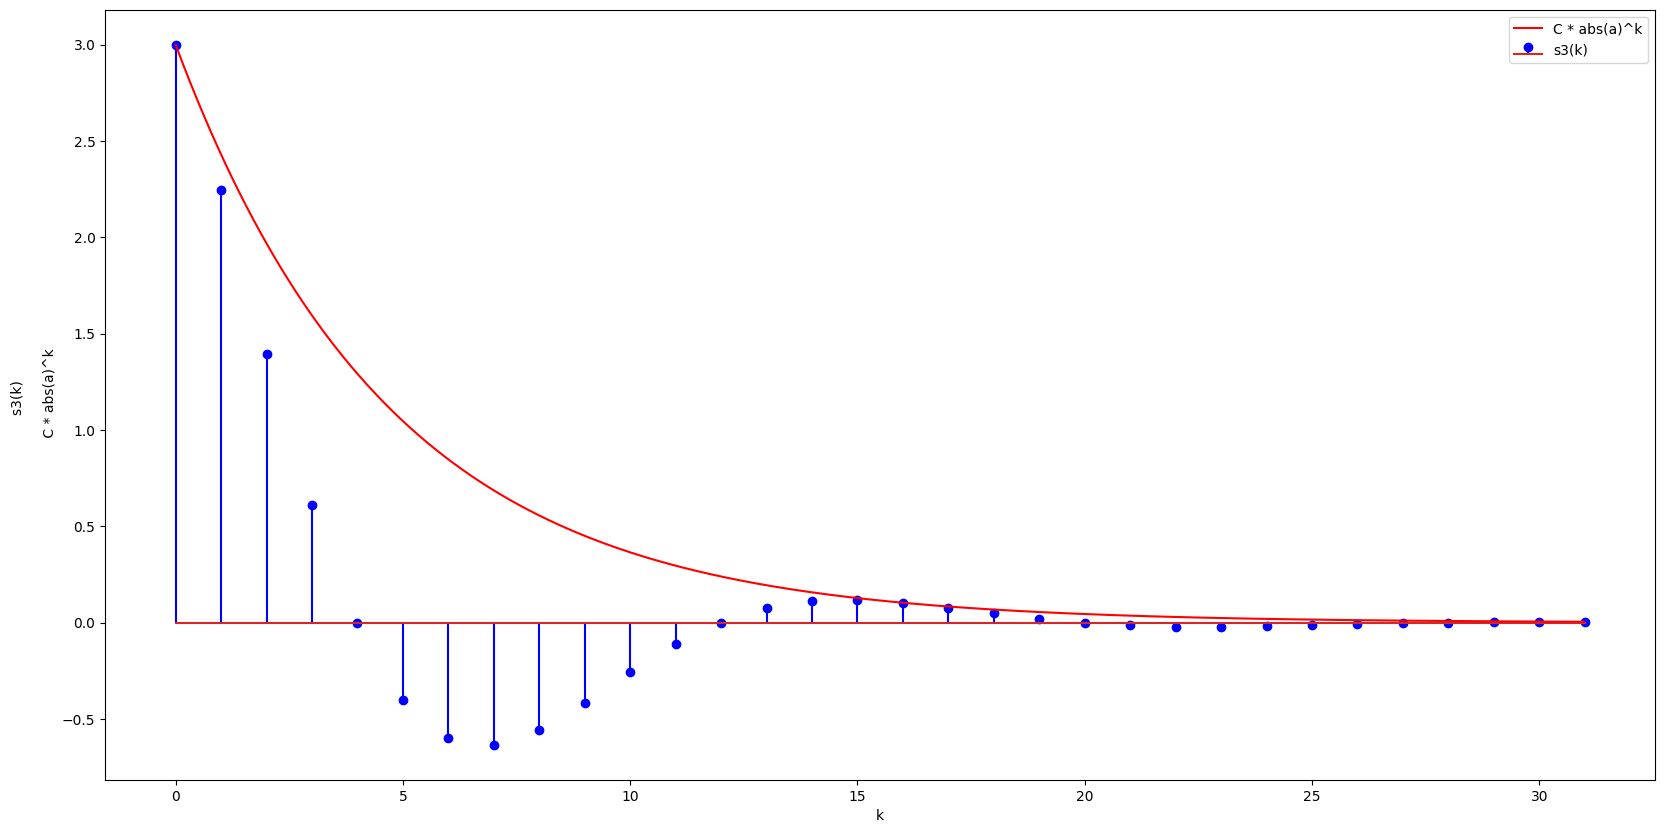

In [45]:
# x для построения s3(k)
x = list(range(N))

print_graphic(
    signal_func=[
        Graphic(
            [
                (plt.stem, discret_gramonic_signal, x, 's3(k)'),
                (plt.plot, envelope_stripe, density_x, 'С * abs(a)^k'),
            ],
            'k',
            's3(k) \n\n C * abs(a)^k'
        ),
    ]
)

### Задание 4. Моделирование периодической последовательности

Вывести график пяти периодов периодической последовательности $ s_4(k) $ дискретных прямоугольных импульсов амплитуды $ U $ и длительности $ n_{imp} $ с периодом, вдвое большим длительности импульса.

---

Для формирования периодической последовательности $ s_4(k) $ были выполнены следующие действия:
1. На основе дискретного единичного скачка из первого задания сформирован один период последовательности;
2. Сформированы пять периодов последовательности с задержкой равной величине $2n_{imp}$ (идентификатор p);
3. Периоды были просуммированы с увеличением задержки для каждого на его порядковый номер (начиная с 0)

In [46]:
def pereodic_rectangle_signal(k: list[int]):
    """s4(k)"""

    p = 2 * n_imp

    some_xs = [[x - i * p for x in k] for i in range(5)]
    rectangles = [rectangle_signal(x) for x in some_xs]
    return [sum((rectangles[j][i] for j in range(5))) for i in range(len(k))]

In [47]:
# период
p = 2 * n_imp
# x для s4(k)
x = list(range(5 * p))

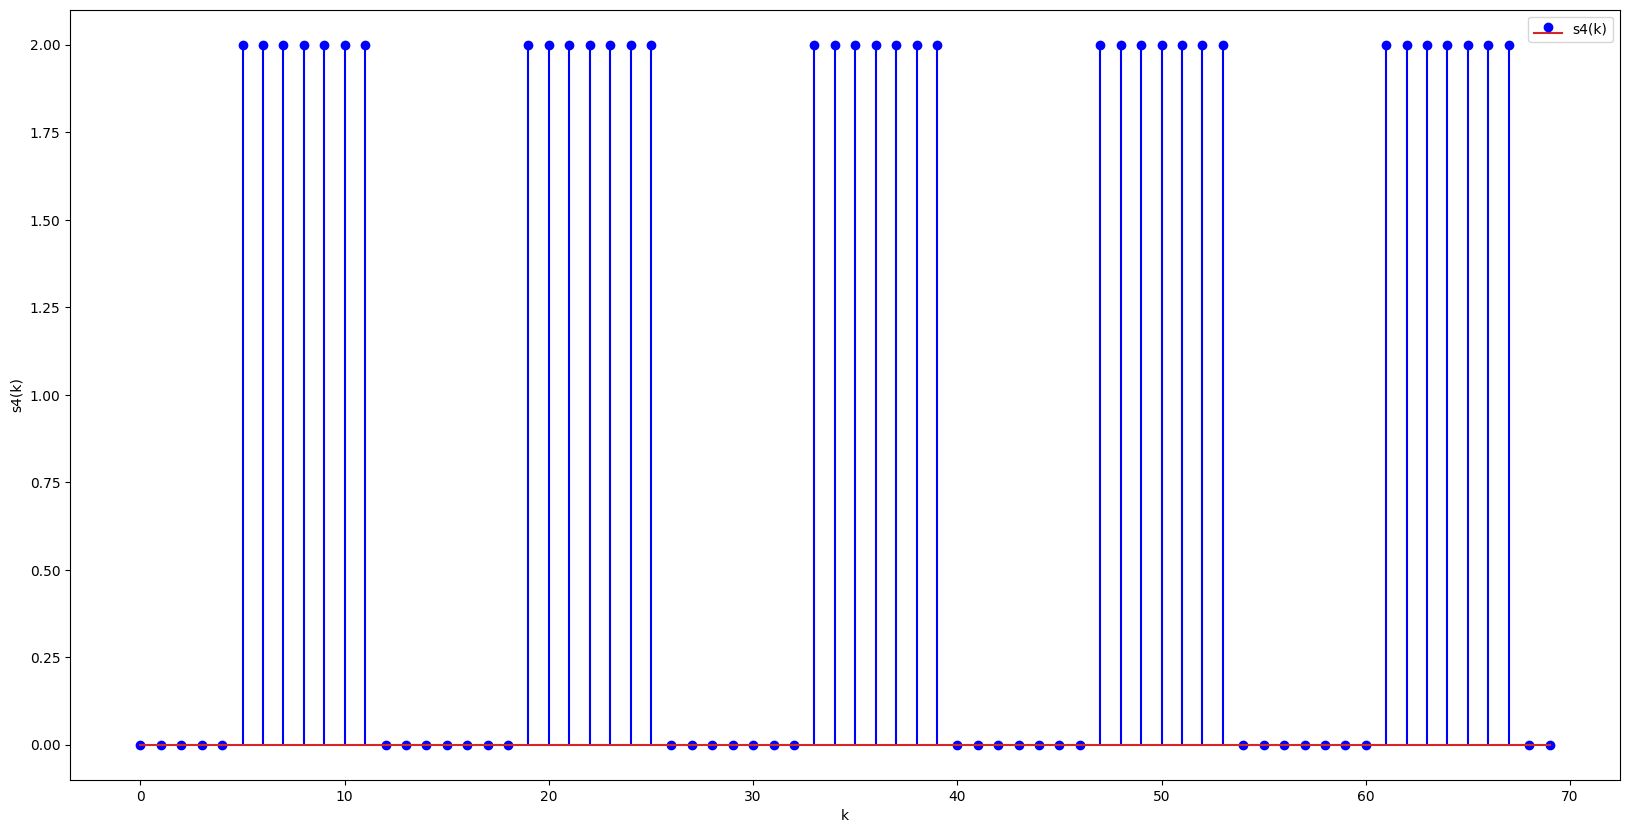

In [48]:
print_graphic(
    signal_func=[
        Graphic([(plt.stem, pereodic_rectangle_signal, x, 's4(k)')], 'k', 's4(k)'),
    ],
)

## Выводы

В результате выполнения практической работы было изучено математическое описание линейных комбинаций дискретных гармонических сигналов и были получены навыки работы с языком программирования Python, необходимые для моделирования. Были смоделированы:
- дискретный прямоугольный импульс на основе дискретного единичного скачка
- линейная комбинация дискретных гармонических сигналов,

а также построены графики:
- дискретного сигнала, представляющего собой дискретный гармонический сигнал с экспоненциальной огибающей
- пяти периодов периодической последовательности дискретных прямоугольных импульсов определенной амплитуды  и длительности с периодом, вдвое большим длительности импульса.

В ходе работы также были определены такие характеристики сигнала, как среднее значение, энергия и средняя мощность сигнала.
